In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )

In [3]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [4]:
test_data.head(5)

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     201 non-null    int64
 1   HHI            201 non-null    int64
 2   HHDL           201 non-null    int64
 3   Married        201 non-null    int64
 4   CollegGrads    201 non-null    int64
 5   AHHAge         201 non-null    int64
 6   Cars           201 non-null    int64
 7   Filed in 2017  201 non-null    int64
 8   Filed in 2016  201 non-null    int64
 9   Filed in 2015  201 non-null    int64
dtypes: int64(10)
memory usage: 15.8 KB


In [6]:
train_data=tax_data

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


### Exploratory Data Analysis

In [8]:
train_data.describe(include='all')

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democrat
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812,NaN
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029,NaN
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000,NaN
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000,NaN
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000,NaN


In [9]:
test_data.describe(include='all')

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,503.532338,146021.20398,28027.970149,0.965174,2.547264,60.651741,2.492537,0.512438,0.527363,0.482587
std,296.674907,83432.62547,588184.526824,0.820842,1.737528,23.996210,1.697408,0.501093,0.500497,0.500944
min,4.000000,1418.00000,-993611.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,249.000000,85083.00000,-488672.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000
50%,510.000000,137468.00000,73466.000000,1.000000,2.000000,61.000000,3.000000,1.000000,1.000000,0.000000
75%,748.000000,220331.00000,529624.000000,2.000000,4.000000,79.000000,4.000000,1.000000,1.000000,1.000000
max,990.000000,299700.00000,985448.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PoliticalParty', ylabel='count'>

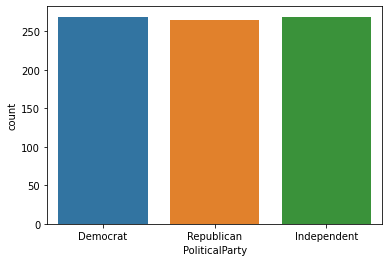

In [10]:
sns.countplot(train_data['PoliticalParty'])

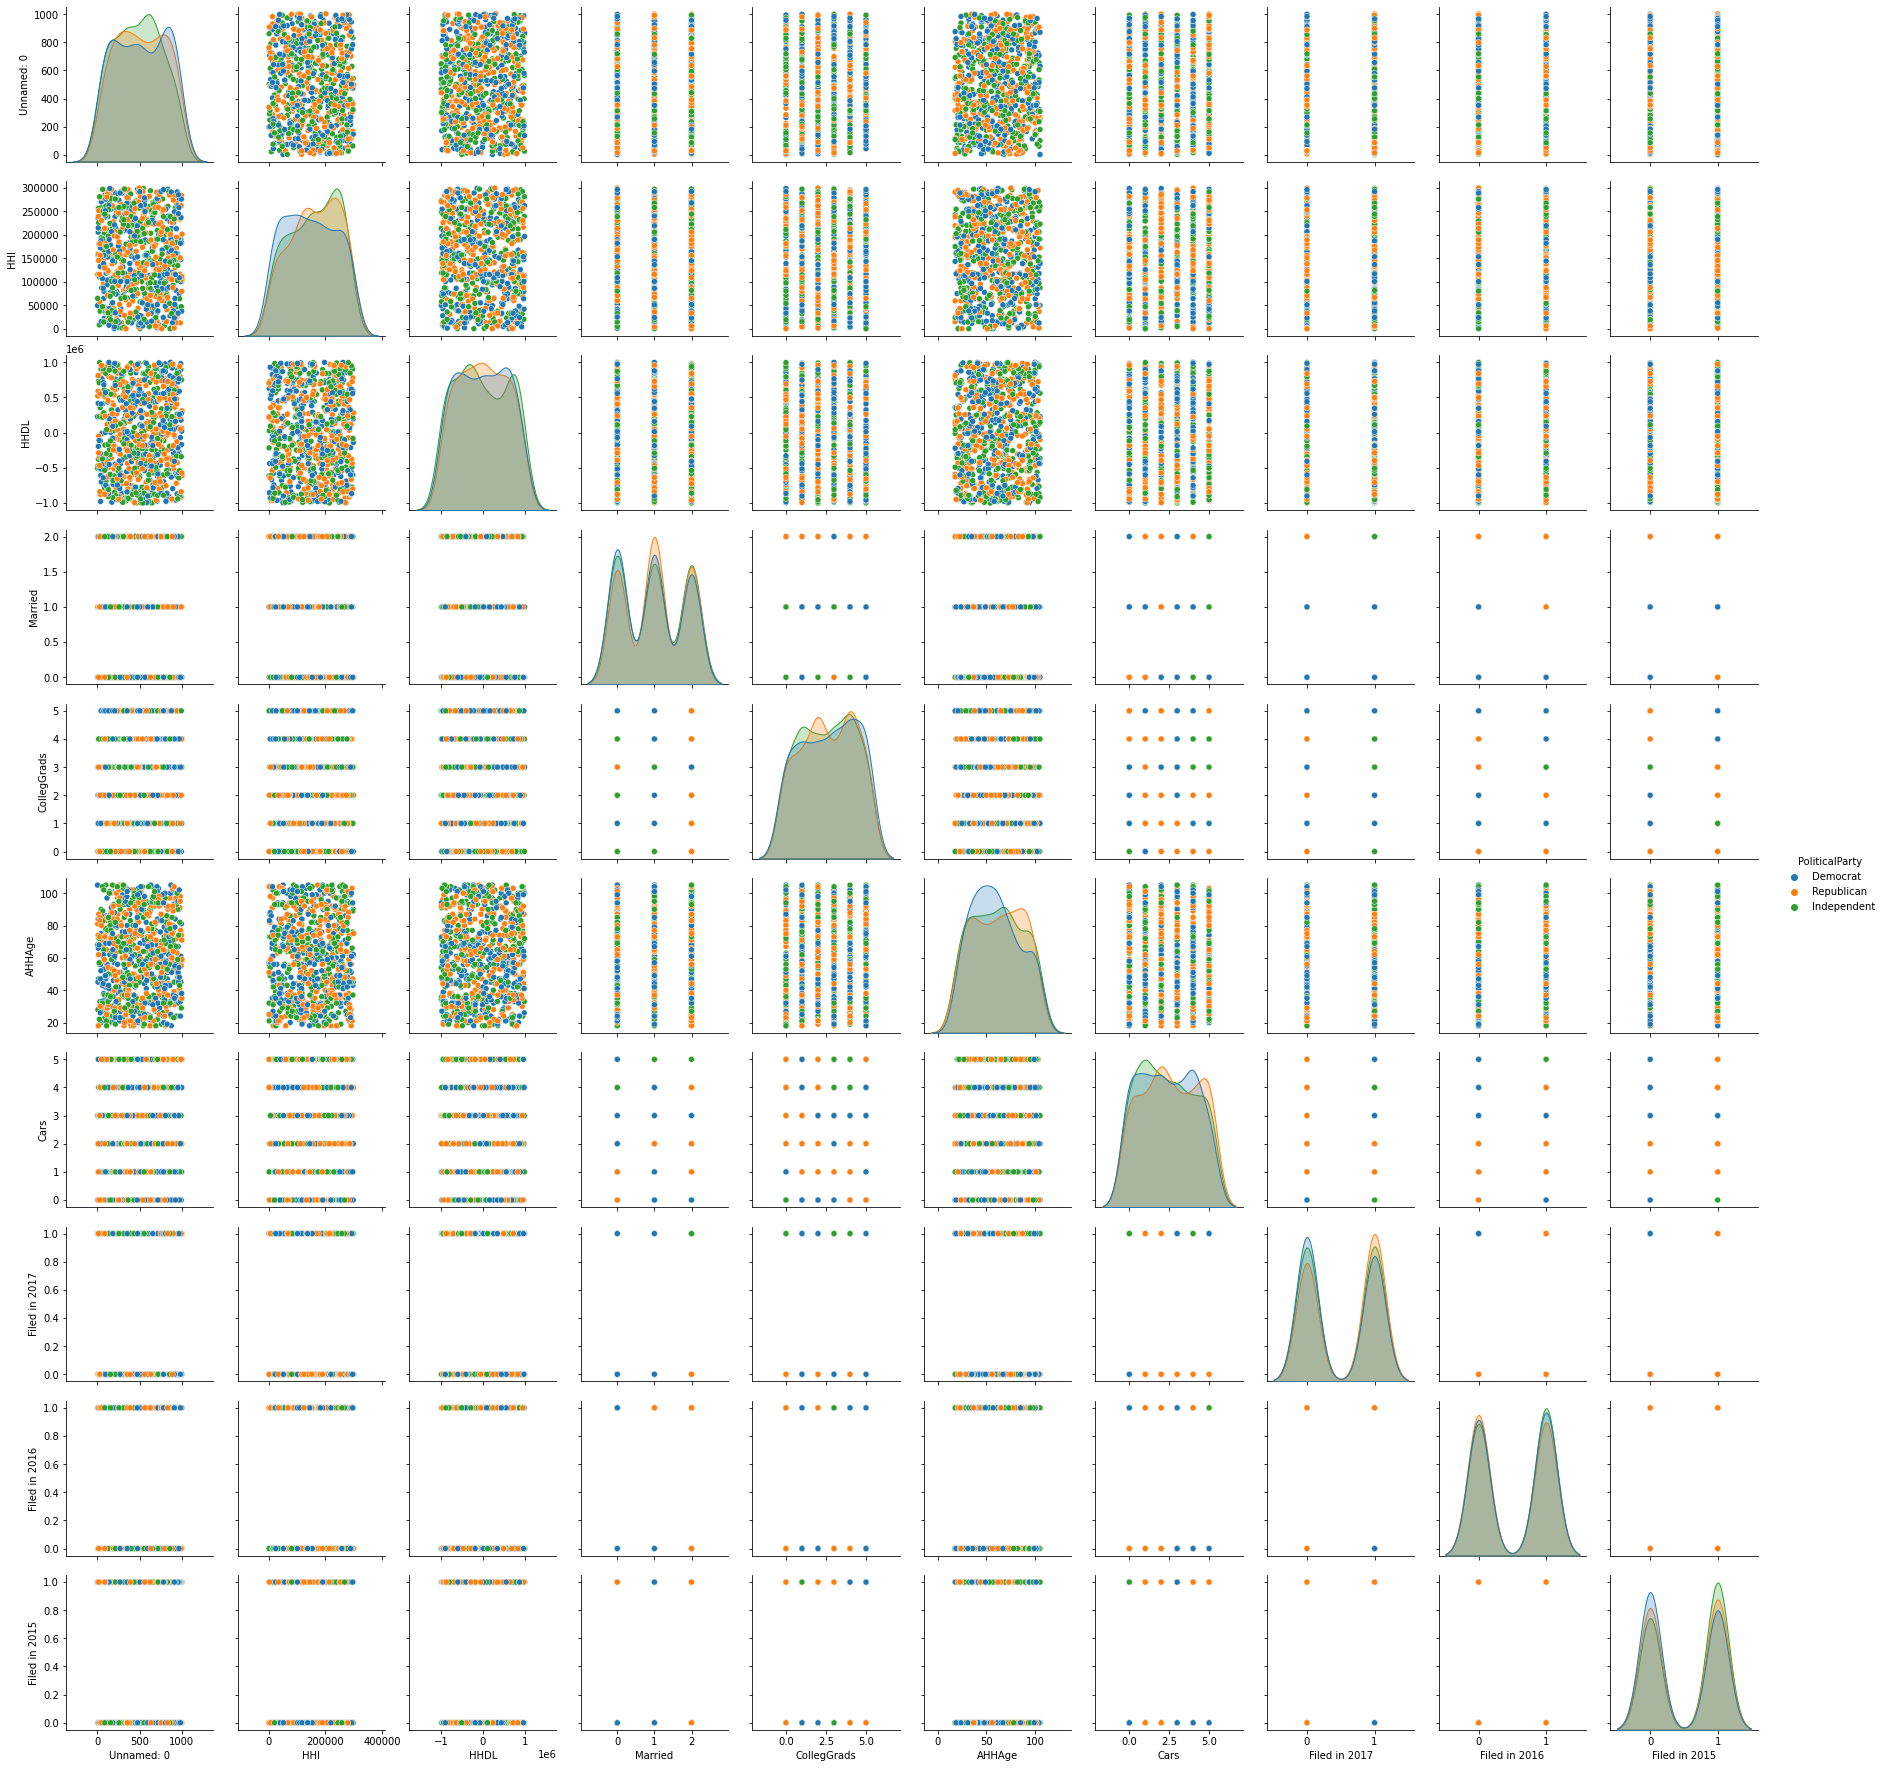

In [11]:
sns.pairplot(train_data,hue='PoliticalParty');

### Model Building

In [17]:
label_encoder = LabelEncoder() 
train_data['PoliticalParty']= label_encoder.fit_transform(train_data['PoliticalParty']) 
train_data['PoliticalParty'].unique() 

array([0, 2, 1])

In [18]:
X=train_data.drop(['PoliticalParty','Unnamed: 0'],axis=1)
test_data=test_data.drop('Unnamed: 0',axis=1)
y=train_data['PoliticalParty']

In [19]:
from sklearn.feature_selection import VarianceThreshold
df_var = VarianceThreshold()
df_var.fit_transform(X)
for feature in zip(X.columns, df_var.variances_):
    print(feature)

('HHI', 299189.0)
('HHDL', 1999622.0)
('Married', 0.6455058784849469)
('CollegGrads', 2.8037760018858298)
('AHHAge', 87.0)
('Cars', 2.89843969299436)
('Filed in 2017', 0.24995308688309245)
('Filed in 2016', 0.24991276486525474)
('Filed in 2015', 0.2497173581634251)


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
test_data=pd.DataFrame(scaler.fit_transform(test_data),columns=test_data.columns)

### Decision Tree Algorithm

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy.random import seed
seed(0)
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']],y,test_size = 0.2,random_state=21,stratify=y)
dt=DecisionTreeClassifier(criterion='gini',max_depth=14)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=14)

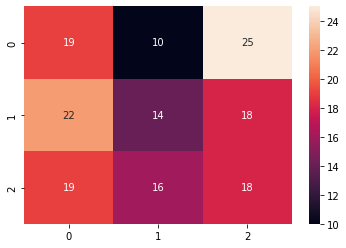

In [22]:
pred=dt.predict(X_test)
cm=confusion_matrix(Y_test,pred)
sns.heatmap(cm,annot=True);

In [23]:
accuracy_score(Y_test,pred)

0.3167701863354037

In [25]:
pred=dt.predict(test_data[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
#pred=tree.predict(test_df)
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("dt.csv",index=False)

### Random Forest Algorithm

In [26]:
rf=RandomForestClassifier(random_state=21)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=21)

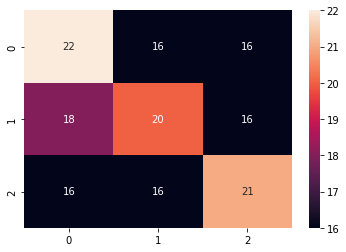

In [27]:
pred=rf.predict(X_test)
cm=confusion_matrix(Y_test,pred)
sns.heatmap(cm,annot=True);

In [28]:
accuracy_score(Y_test,pred)

0.391304347826087

In [30]:
pred=rf.predict(test_data[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("rf.csv",index=False)